# King County Housing EDA
Price forecasting is a prevalent task in the realms of data science and machine learning, and a major use case for forecasting remains at the intersection of real estate and machine learning. Home ownership is considered a major hurdle within the United States, as finding the right residence for one's capabilities and goals requires extensive financing and planning. The objective of this project is to explore the factors that affect housing prices within King County, and to construct a model that that is able to create accurate predictions based off of these latent factors. The order of the following notebooks are structured in this manner:

<ol>
<li>EDA - Univariate/Multivariate Analysis
<li>Feature Engineering - Constructing new features
<li>Model Tuning - Tuning Baseline Models
<li>Model Selection - Performance Evaluation of Models and Ensembling Existing Models
<li>Model Prediction and Final Analysis
</ol>

This portion entails the EDA process of the project, which is mostly centered around univariate analysis of price.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os
import seaborn as sns

In [2]:
#King Housing County Dataset
housing_data = pd.read_csv('kc_house_data.csv')

The King County housing data contains the following features:
<ul>
<li> id - ID associated with property
<li> price - price of property in USD
<li> bedrooms - number of bedrooms in property
<li> bathrooms - number of bathrooms in property
<li> sqft_living - amount of land used as living space in sqft (including basement)
<li> sqft_lot - total amount of land in sqft
<li> floors - number of floors
<li> waterfront - if the house features a waterfront (0,1)
<li> view - if the house has a view (0-4)
<li> condition - current condition of house (1-5), 1 meaning poor, 5 meaning excellent.
<li> grade - ranking of property (1-11)
<li> sqft_above - amount of land used above as living space (excluding basement)
<li> sqft_basement - size of basement
<li> yr_built - year property was built
<li> yr_renovated - most recent renovation
<li> zipcode - residing zipcode of property
<li> lat - lat associated with property
<li> long - long associated with property
<li> sqft_living15 - amount of area used as living space in 2015 (including basement)
<li> sqft_lot15 - total amount of land in sqft in 2015
</ul>

In [3]:
pd.set_option('display.max_columns', None)
housing_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Despite most feature headers being obvious, two in particular raise some questions.  The features 'sqft_living15' and 'sqft_lot15' denote the living and lot areas, respectively as reported in 2015, while the features with similar names denote the property's information from a previous time. Two hypothesis are apparent with consideration to housing prices: quality and location may be the two primary correlative factors in regards to the home of a price.

In [4]:
#primary questions to analyze
#What's the spread of house construction years in King County?
#Do older houses have the same price as newer houses?
#What is 'grade'? Not clearly defined, perhaps plot against price to see any trends
#How many houses in this dataset actually have a basement?

In [5]:
#examine data
housing_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
housing_data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
#dates are not in a very readable format
#parse dates and update dataframe, grouping by date/month
housing_data['date'] = housing_data['date'].map(lambda x: str(x)[:-7])
housing_data['date'] = pd.to_datetime(housing_data['date'], format='%Y%m%d')

In [8]:
housing_data['yr_purch'] = housing_data['date'].map(lambda x: str(x)[:4])
housing_data['mnth_purch'] = housing_data['date'].map(lambda x: str(x)[5:7])
housing_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_purch,mnth_purch
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,02
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,02


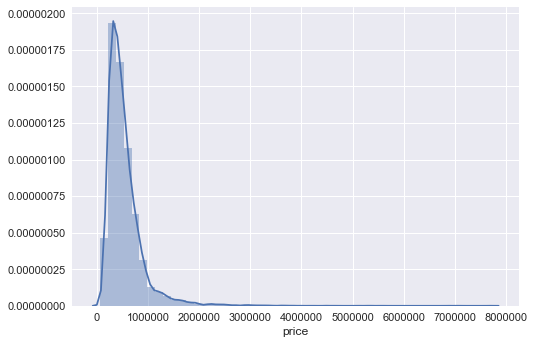

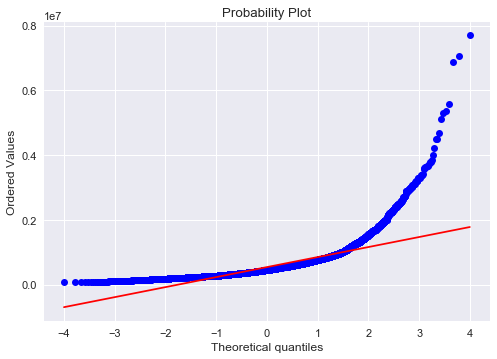

In [110]:
sns.distplot(housing_data['price'])
plt.show()
res = stats.probplot((housing_data['price']), plot=plt)

Price exhibits a right heavy skew, indicating that log-normalization might be used in the future to improve performance on models that require normal distributions.

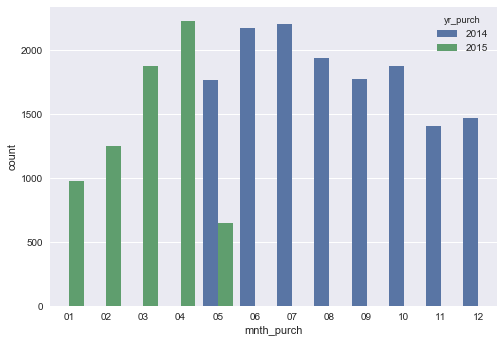

In [11]:
sns.countplot(x='mnth_purch', data=housing_data, hue='yr_purch')

In [12]:
y2015_prices = housing_data[housing_data['yr_purch'] == '2015']
y2014_prices = housing_data[housing_data['yr_purch'] == '2014']
y2015_prices.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,6.980000e+03,6.980000e+03,6980.000000,6980.00000,6980.000000,6.980000e+03,6980.000000,6980.000000,6980.000000,6980.000000,6980.000000,6980.000000,6980.000000,6980.000000,6980.000000,6980.000000,6980.000000,6980.000000,6980.000000,6980.000000
mean,4.622485e+09,5.419890e+05,3.357593,2.08510,2041.285100,1.543492e+04,1.476862,0.007020,0.235817,3.366476,7.605158,1759.827937,281.457163,1971.154298,70.614900,98078.031948,47.554192,-122.213841,1964.984527,12765.097564
std,2.883375e+09,3.628418e+05,0.903056,0.76629,893.383106,4.859022e+04,0.538397,0.083497,0.764209,0.618823,1.167687,812.317716,429.826851,29.131127,368.720053,53.713363,0.140568,0.139569,672.209049,29658.874158
min,1.000102e+06,7.500000e+04,0.000000,0.00000,390.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,390.000000,0.000000,1900.000000,0.000000,98001.000000,47.162200,-122.511000,399.000000,748.000000
25%,2.131701e+09,3.249500e+05,3.000000,1.50000,1400.000000,5.059500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1952.000000,0.000000,98033.000000,47.456475,-122.328000,1480.000000,5120.000000
50%,3.935900e+09,4.505000e+05,3.000000,2.25000,1878.000000,7.575500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1974.000000,0.000000,98065.000000,47.563650,-122.228500,1820.000000,7620.000000
75%,7.417250e+09,6.432375e+05,4.000000,2.50000,2500.000000,1.050000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2170.000000,530.000000,1997.000000,0.000000,98118.000000,47.675225,-122.125000,2330.000000,10000.000000
max,9.842300e+09,5.350000e+06,9.000000,6.50000,8000.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7880.000000,2390.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [13]:
y2014_prices.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.463300e+04,1.463300e+04,14633.000000,14633.000000,14633.000000,1.463300e+04,14633.000000,14633.000000,14633.000000,14633.000000,14633.000000,14633.000000,14633.000000,14633.000000,14633.000000,14633.000000,14633.000000,14633.000000,14633.000000,14633.000000
mean,4.560180e+09,5.391814e+05,3.377161,2.128904,2098.319073,1.495053e+04,1.502631,0.007791,0.233582,3.429919,7.681542,1802.015240,296.303834,1970.933985,90.978883,98077.895852,47.562848,-122.213923,1996.840498,12770.057473
std,2.873192e+09,3.691627e+05,0.942636,0.771628,929.621019,3.752184e+04,0.540567,0.087923,0.767346,0.664473,1.178388,835.193434,448.463475,29.489005,416.334428,53.407146,0.137514,0.141430,691.376543,26107.338627
min,1.000102e+06,7.800000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,460.000000,651.000000
25%,2.115200e+09,3.200000e+05,3.000000,1.750000,1440.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.477600,-122.328000,1490.000000,5099.000000
50%,3.902100e+09,4.500000e+05,3.000000,2.250000,1930.000000,7.634000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1580.000000,0.000000,1975.000000,0.000000,98065.000000,47.576400,-122.231000,1850.000000,7620.000000
75%,7.298900e+09,6.450000e+05,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2240.000000,580.000000,1997.000000,0.000000,98117.000000,47.678900,-122.125000,2380.000000,10125.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6110.000000,560617.000000


The differences between 2014 and 2015 homes are nominally different. 

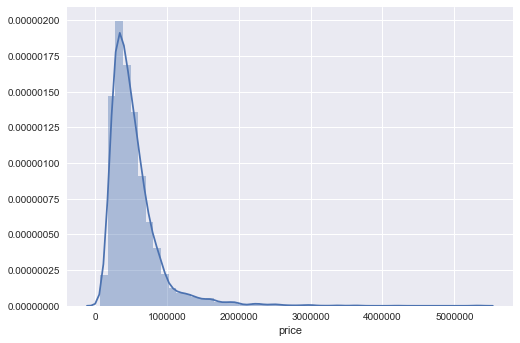

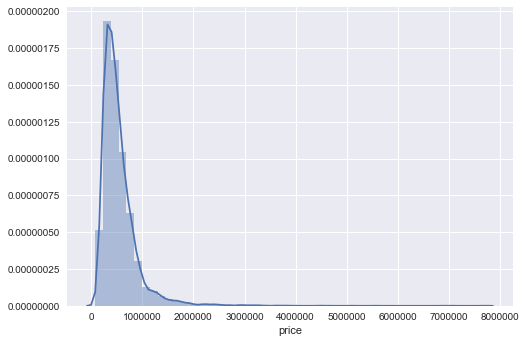

In [14]:
sns.distplot(y2015_prices['price'])
plt.show()
sns.distplot(y2014_prices['price'])

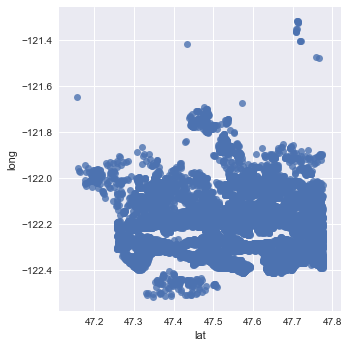

In [15]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1)
sns.lmplot(x = 'lat', y = 'long', data=housing_data, fit_reg=False);

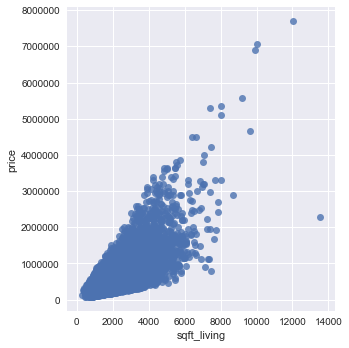

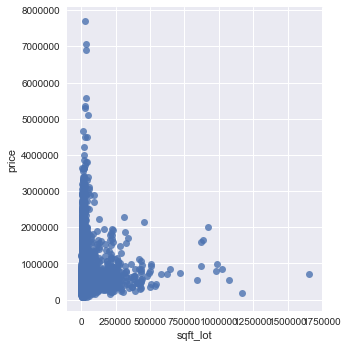

In [111]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1)
sns.lmplot(x='sqft_living', y='price', data=housing_data,fit_reg=False)
plt.show()
plt.figure(figsize=(15,10))
sns.set(font_scale=1)
x = sns.lmplot(x='sqft_lot', y='price', data=housing_data, fit_reg=False)
plt.show()

sqft_living exhibits a strong linear relationship with price. However, sqft_lot does not exhibit the same sense of linearity in regards to price.

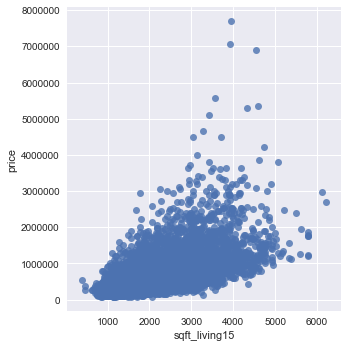

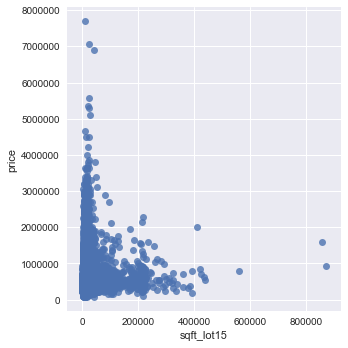

In [112]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1)
sns.lmplot(x='sqft_living15', y='price', data=housing_data,fit_reg=False)
plt.show()
plt.figure(figsize=(15,10))
sns.set(font_scale=1)
x = sns.lmplot(x='sqft_lot15', y='price', data=housing_data, fit_reg=False)

By 2015, sqft_living's linearity seems to have lost it's overall shape.

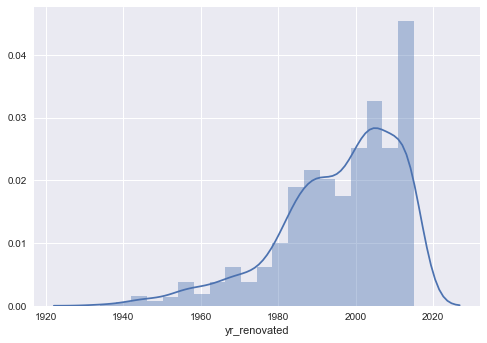

In [21]:
j = housing_data[housing_data['yr_renovated'] > 0]
sns.distplot(j['yr_renovated'])

These houses seem to bear large amount of recent renovation, with a large amount of renovations in the 2000s and onwards.

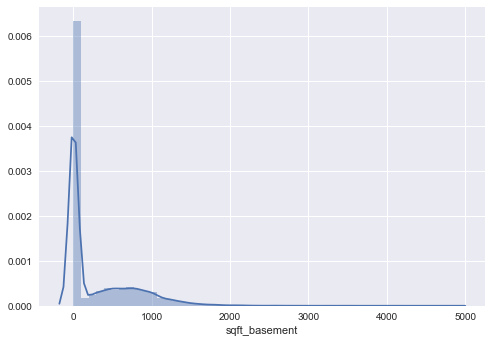

In [113]:
sns.distplot(housing_data['sqft_basement'])

A majority of houses do not actually have a basement in King County, exhibited by the spike in the graph above.

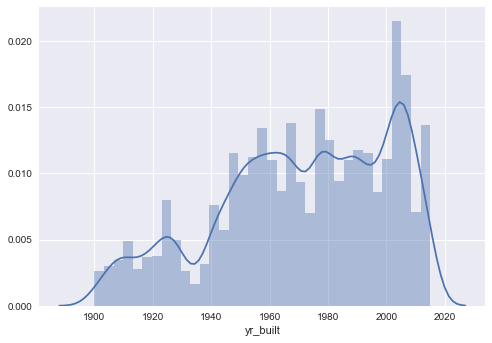

In [23]:
sns.distplot(housing_data['yr_built'])

An interesting tidbit is that there seems to be a considerable increase in production after the later half of the 1950s and onwards. Perhaps this large boom was due to a resurgence in economy after World War 2? The houses face a higher peak at the turn of the 2000s, eclipsing a somehwat steady trend from the 1960s-1990s.

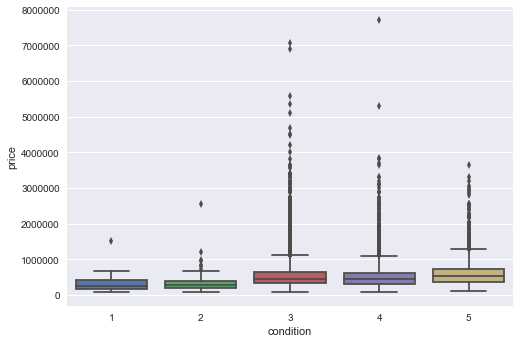

In [24]:
sns.boxplot(y='price', x='condition', data=housing_data)

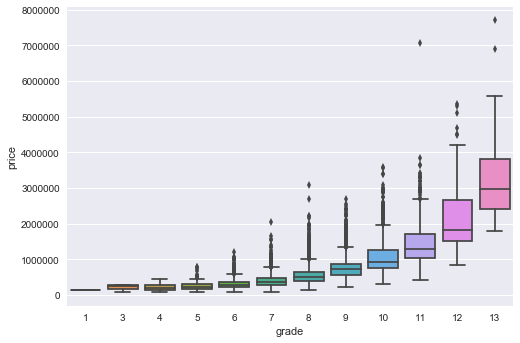

In [25]:
sns.boxplot(y='price', x='grade', data=housing_data)

As grade increases, the overall prices tends to increase.

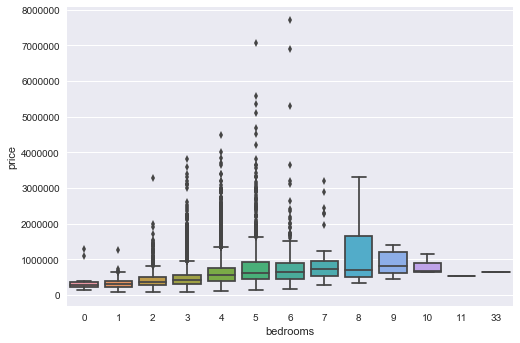

In [27]:
sns.boxplot(y='price', x='bedrooms', data=housing_data)

There is a slight increase in median price as bedroom number increases. Most notably, there is an outlier at 33 bedrooms, which is likely a typo. This will be removed later.

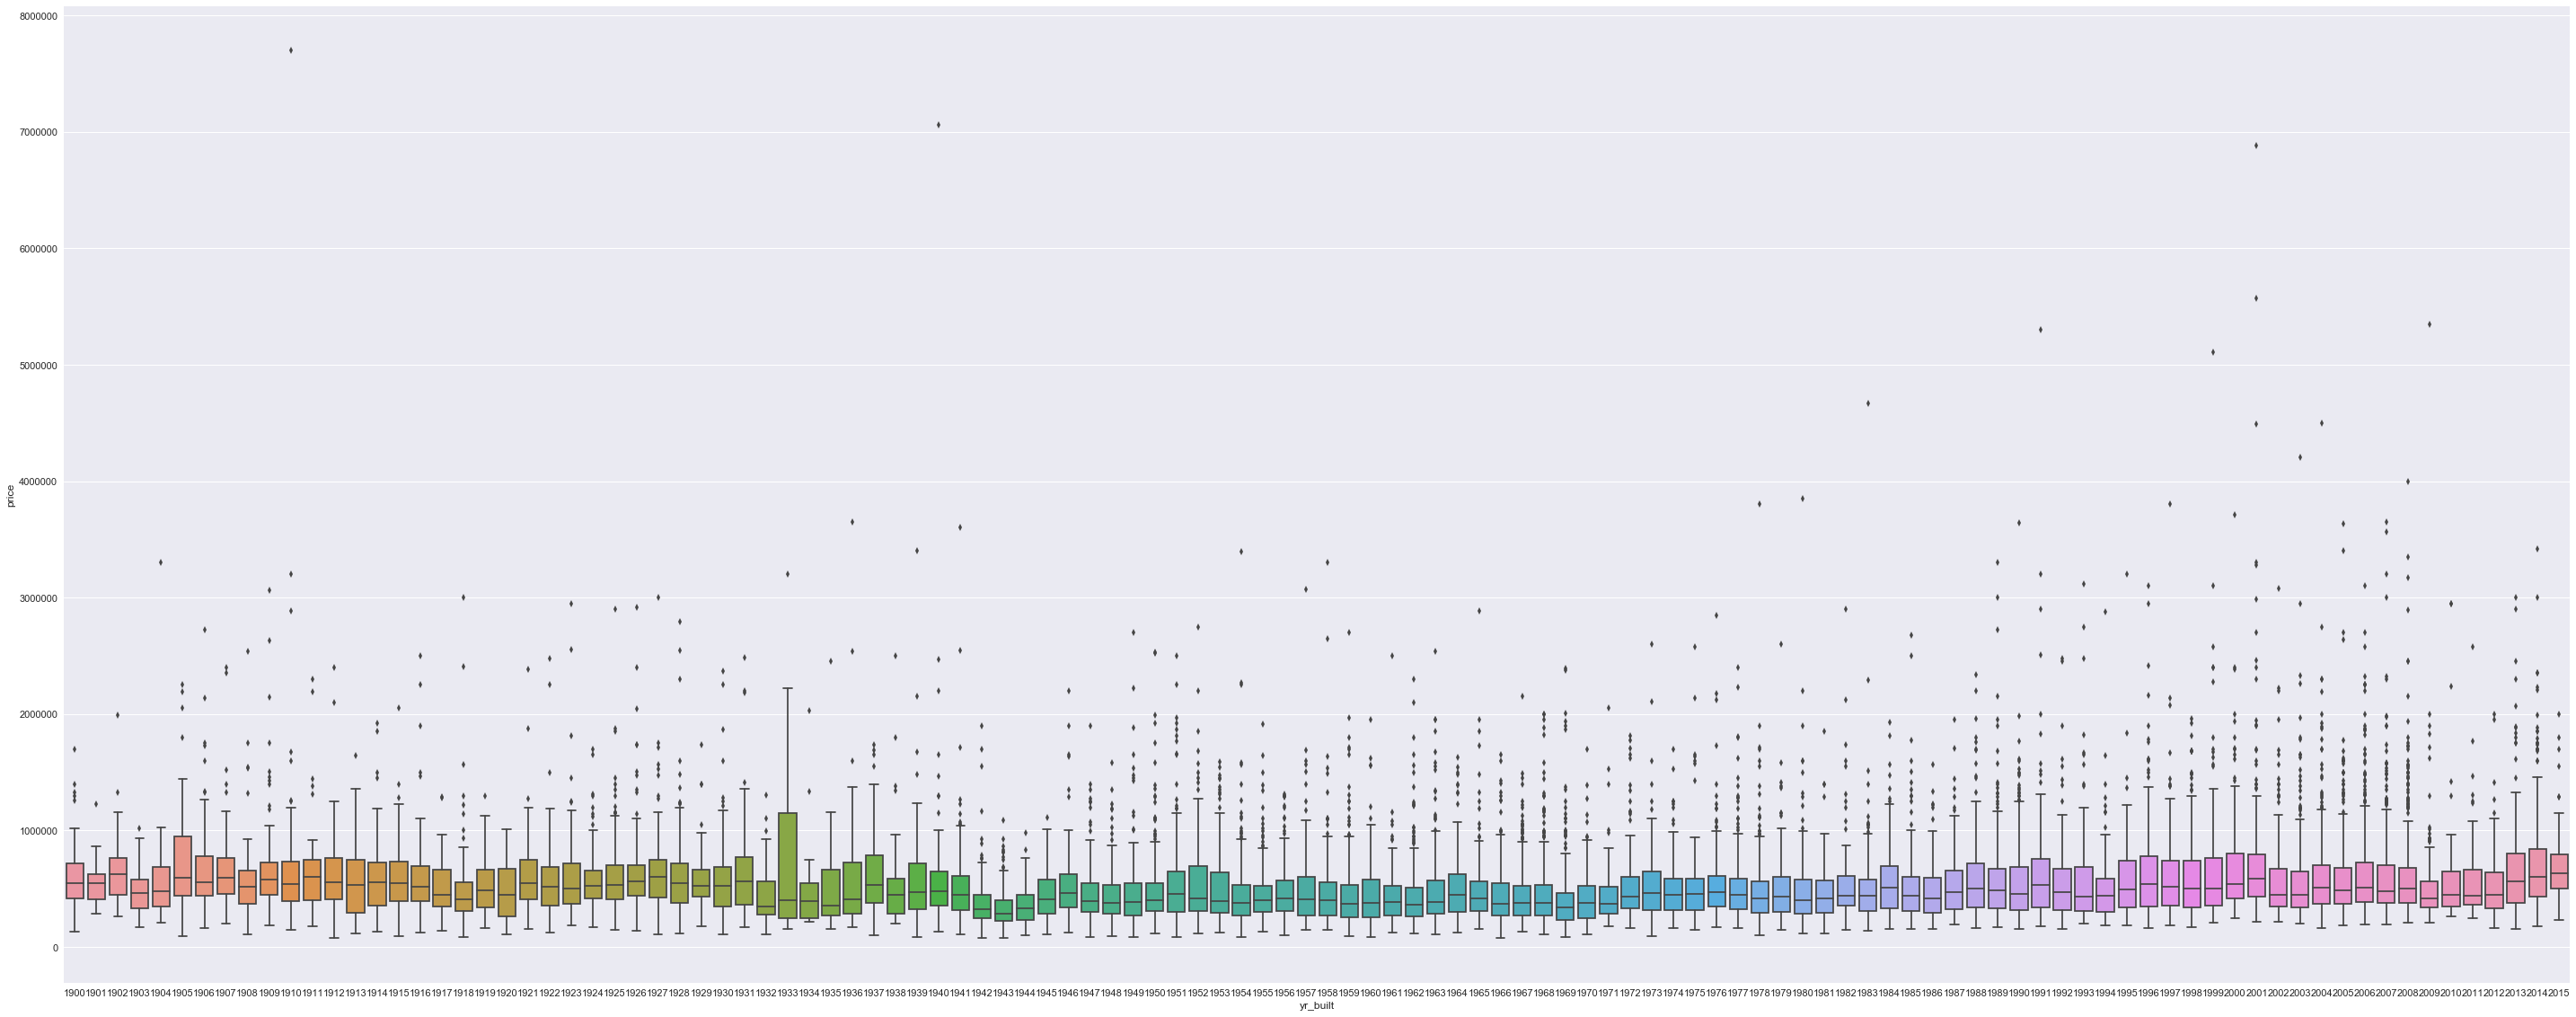

In [28]:
plt.figure(figsize=(50,20))
sns.set(font_scale=1.1)
sns.boxplot(y='price', x='yr_built', data=housing_data)

Housing prices throughout the years seem to be relatively stable, with the median values

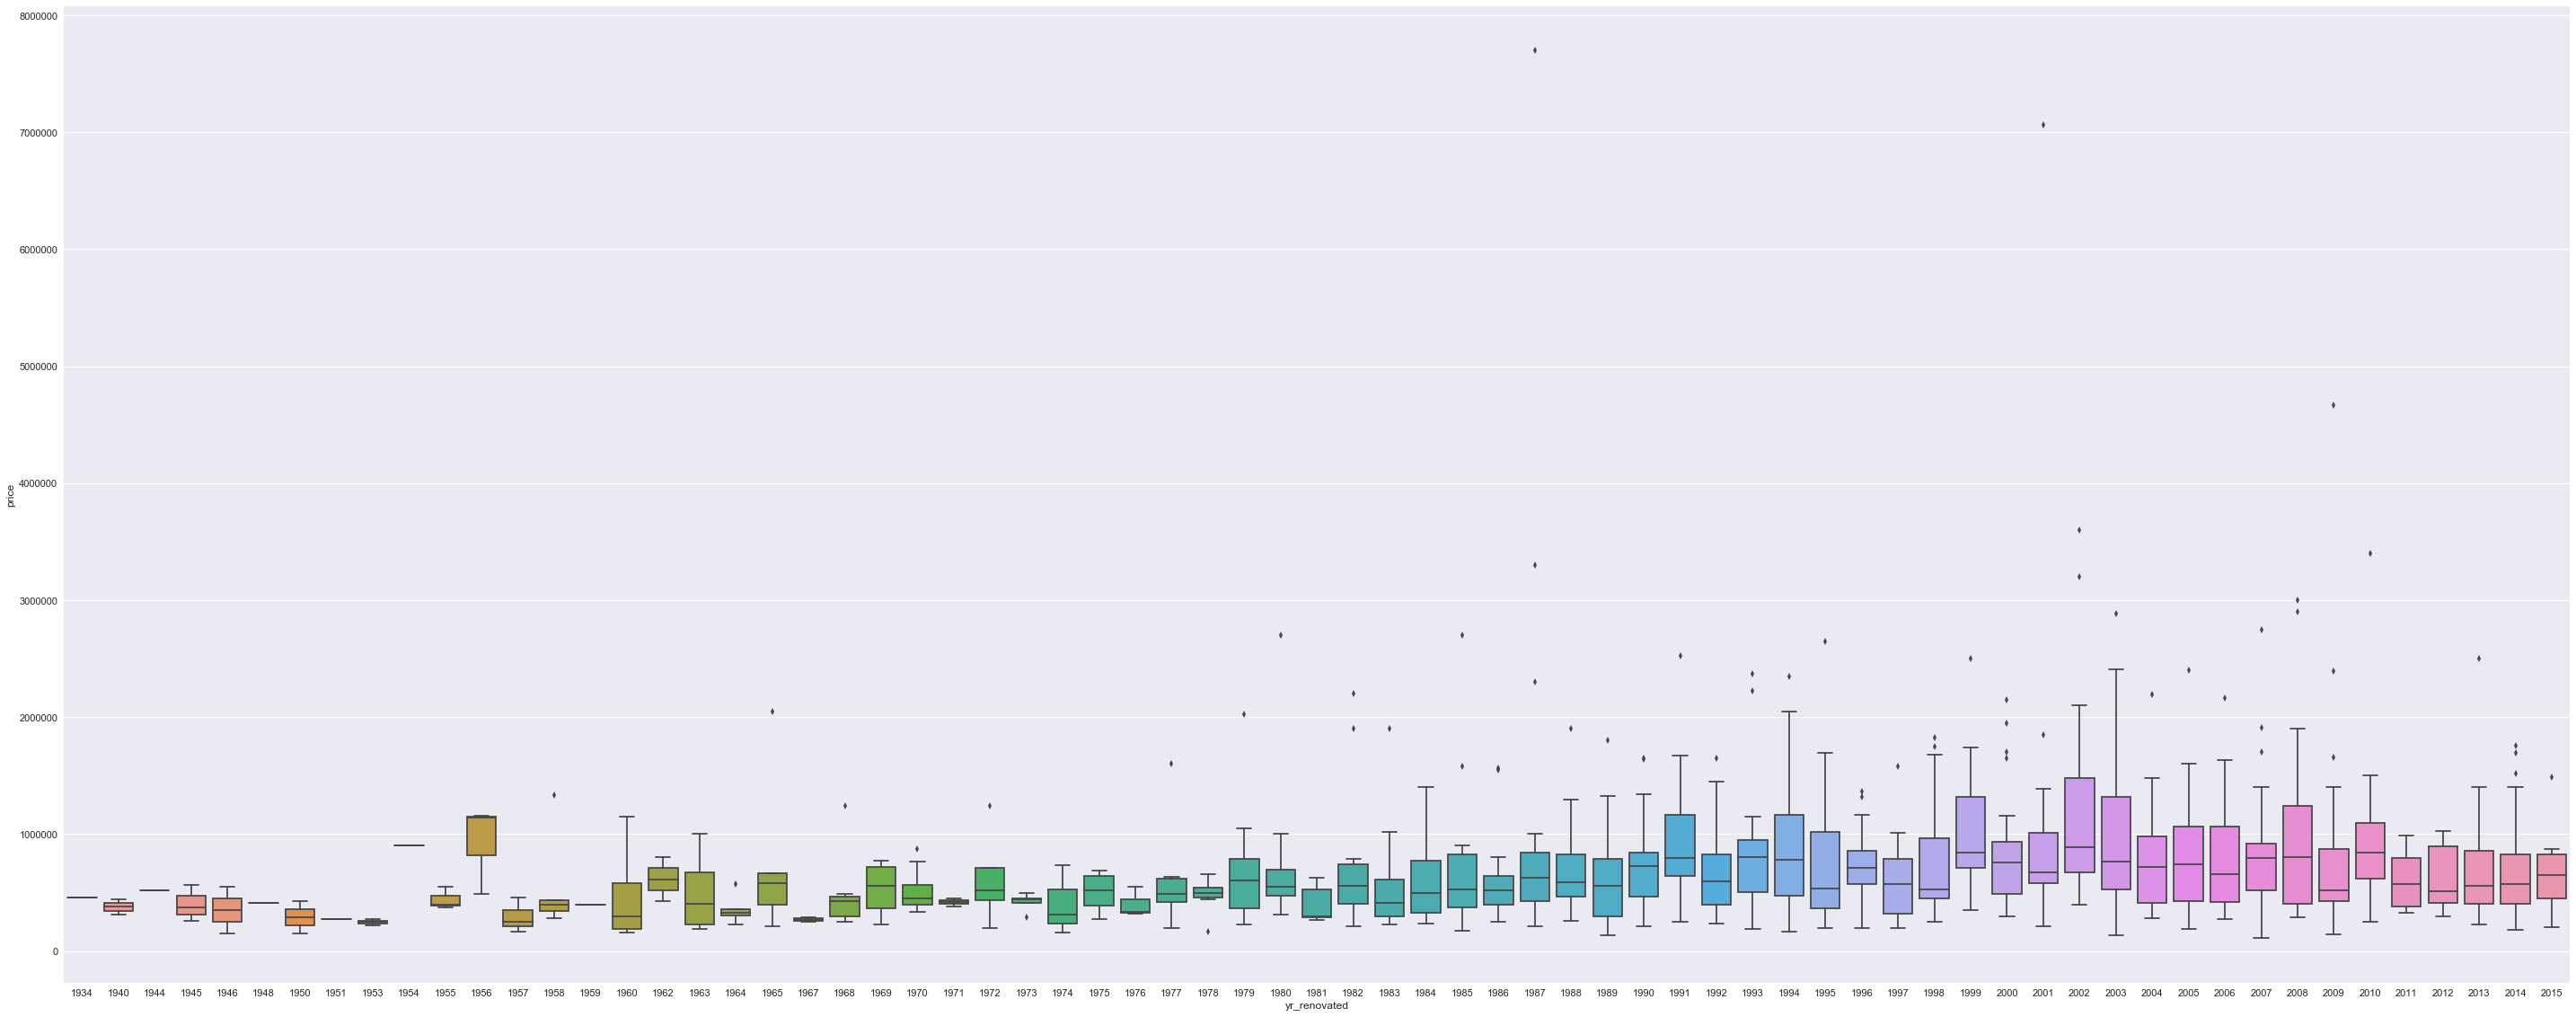

In [29]:
plt.figure(figsize=(50,20))
sns.set(font_scale=1.1)
sns.boxplot(y='price', x='yr_renovated', data=housing_data[housing_data['yr_renovated'] > 0])

Though it is rather slight, it seems that houses that are more

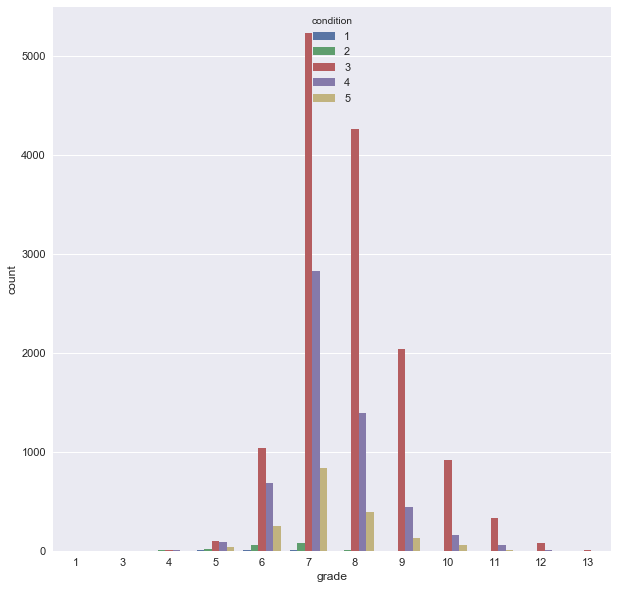

In [30]:
plt.figure(figsize=(10,10))
sns.countplot(x='grade', data=housing_data, hue ='condition')

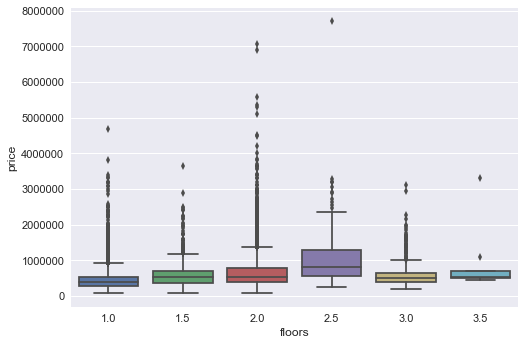

In [31]:
sns.boxplot(y='price', x='floors', data=housing_data)

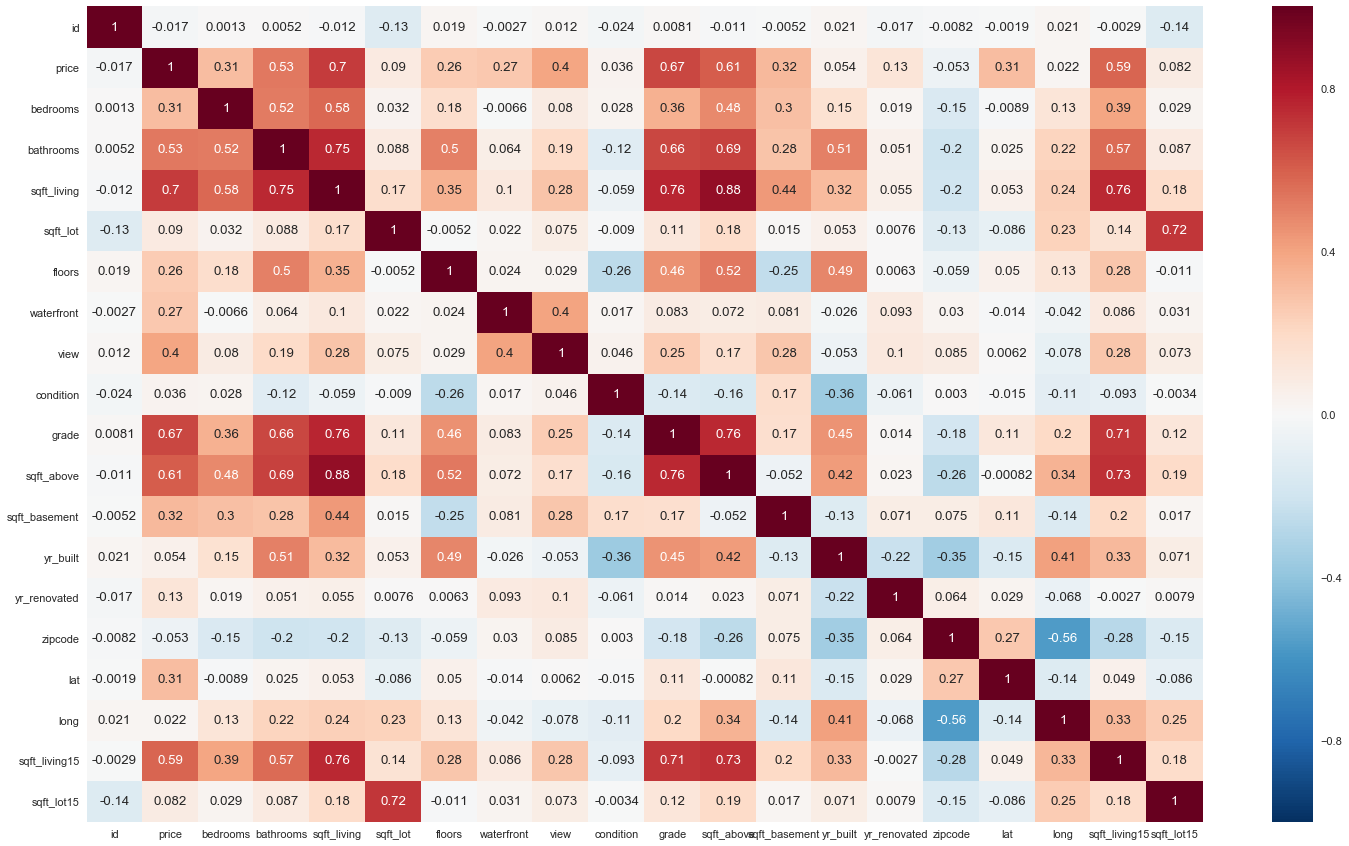

In [32]:
plt.figure(figsize=(25,15))
sns.heatmap(housing_data.corr(), annot=True)

Features that show strong positive correlation with price are sqft_living, grade, and sqft_above. Grade itself has a strong postive correlation with sqft_above, as does sqft_living with sqft_above. It is apparent that these increases with regards to living space and overal house grade may result in an increase in price.

In [33]:
housing_data.isnull().values.sum()

0

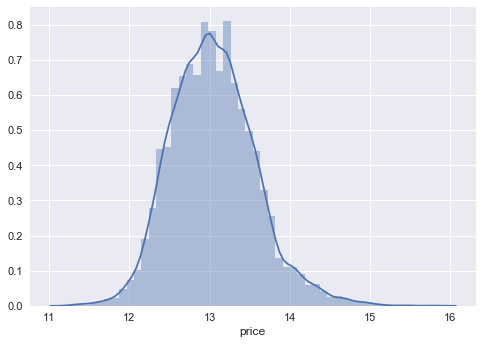

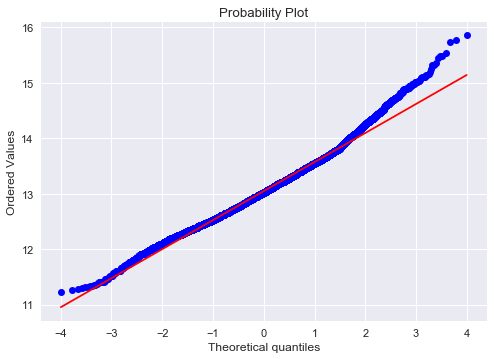

In [34]:
#shows peakedness and right heavy sky
#gaussian distribution. we can use certain ML algorithms
sns.distplot(np.log(housing_data['price']))
plt.show()
res = stats.probplot(np.log(housing_data['price']), plot=plt)
plt.show()

In [115]:
#0br, 0bath - is that a combination
#perhaps a small studio APARTMENT?  given that this is of HOUSING, is the data correct?
apartments = housing_data[(housing_data['bedrooms'] == 0) & (housing_data['bathrooms'] == 0)]
apartments

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_purch,mnth_purch
875,6306400140,2014-06-12,1095000.0,0,0.0,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000,2014,6
3119,3918400017,2015-02-05,380000.0,0,0.0,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399,2015,2
6994,2954400190,2014-06-24,1295650.0,0,0.0,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061,2014,6
9773,3374500520,2015-04-29,355000.0,0,0.0,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050,2015,4
9854,7849202190,2014-12-23,235000.0,0,0.0,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200,2014,12
14423,9543000205,2015-04-13,139950.0,0,0.0,844,4269,1.0,0,0,4,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600,2015,4
19452,3980300371,2014-09-26,142000.0,0,0.0,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850,2014,9


In [ ]:
housing_data = housing_data.drop(housing_data[(housing_data['bedrooms'] == 0) & (housing_data['bathrooms'] == 0)], axis=1)

### Zip Codes and Locality
It is common knowledge that some places are more expensive than others.  For this reason, analysis of location is a necessity.  Unfortunately, it is difficult to explore the impact of region absent a map, and even with a basic map, the current limitations of this notebook environment conflict with thorough analysis potential.  A reasonable, but more code-extensive solution, is to quickly develop a small web application for interactive location analytics but prior to doing so, performing analysis on zip codes and perhaps crude visualizations on geolocation data and their effects on other features can provide insight to decide if such an endeavor is worthwhile. 

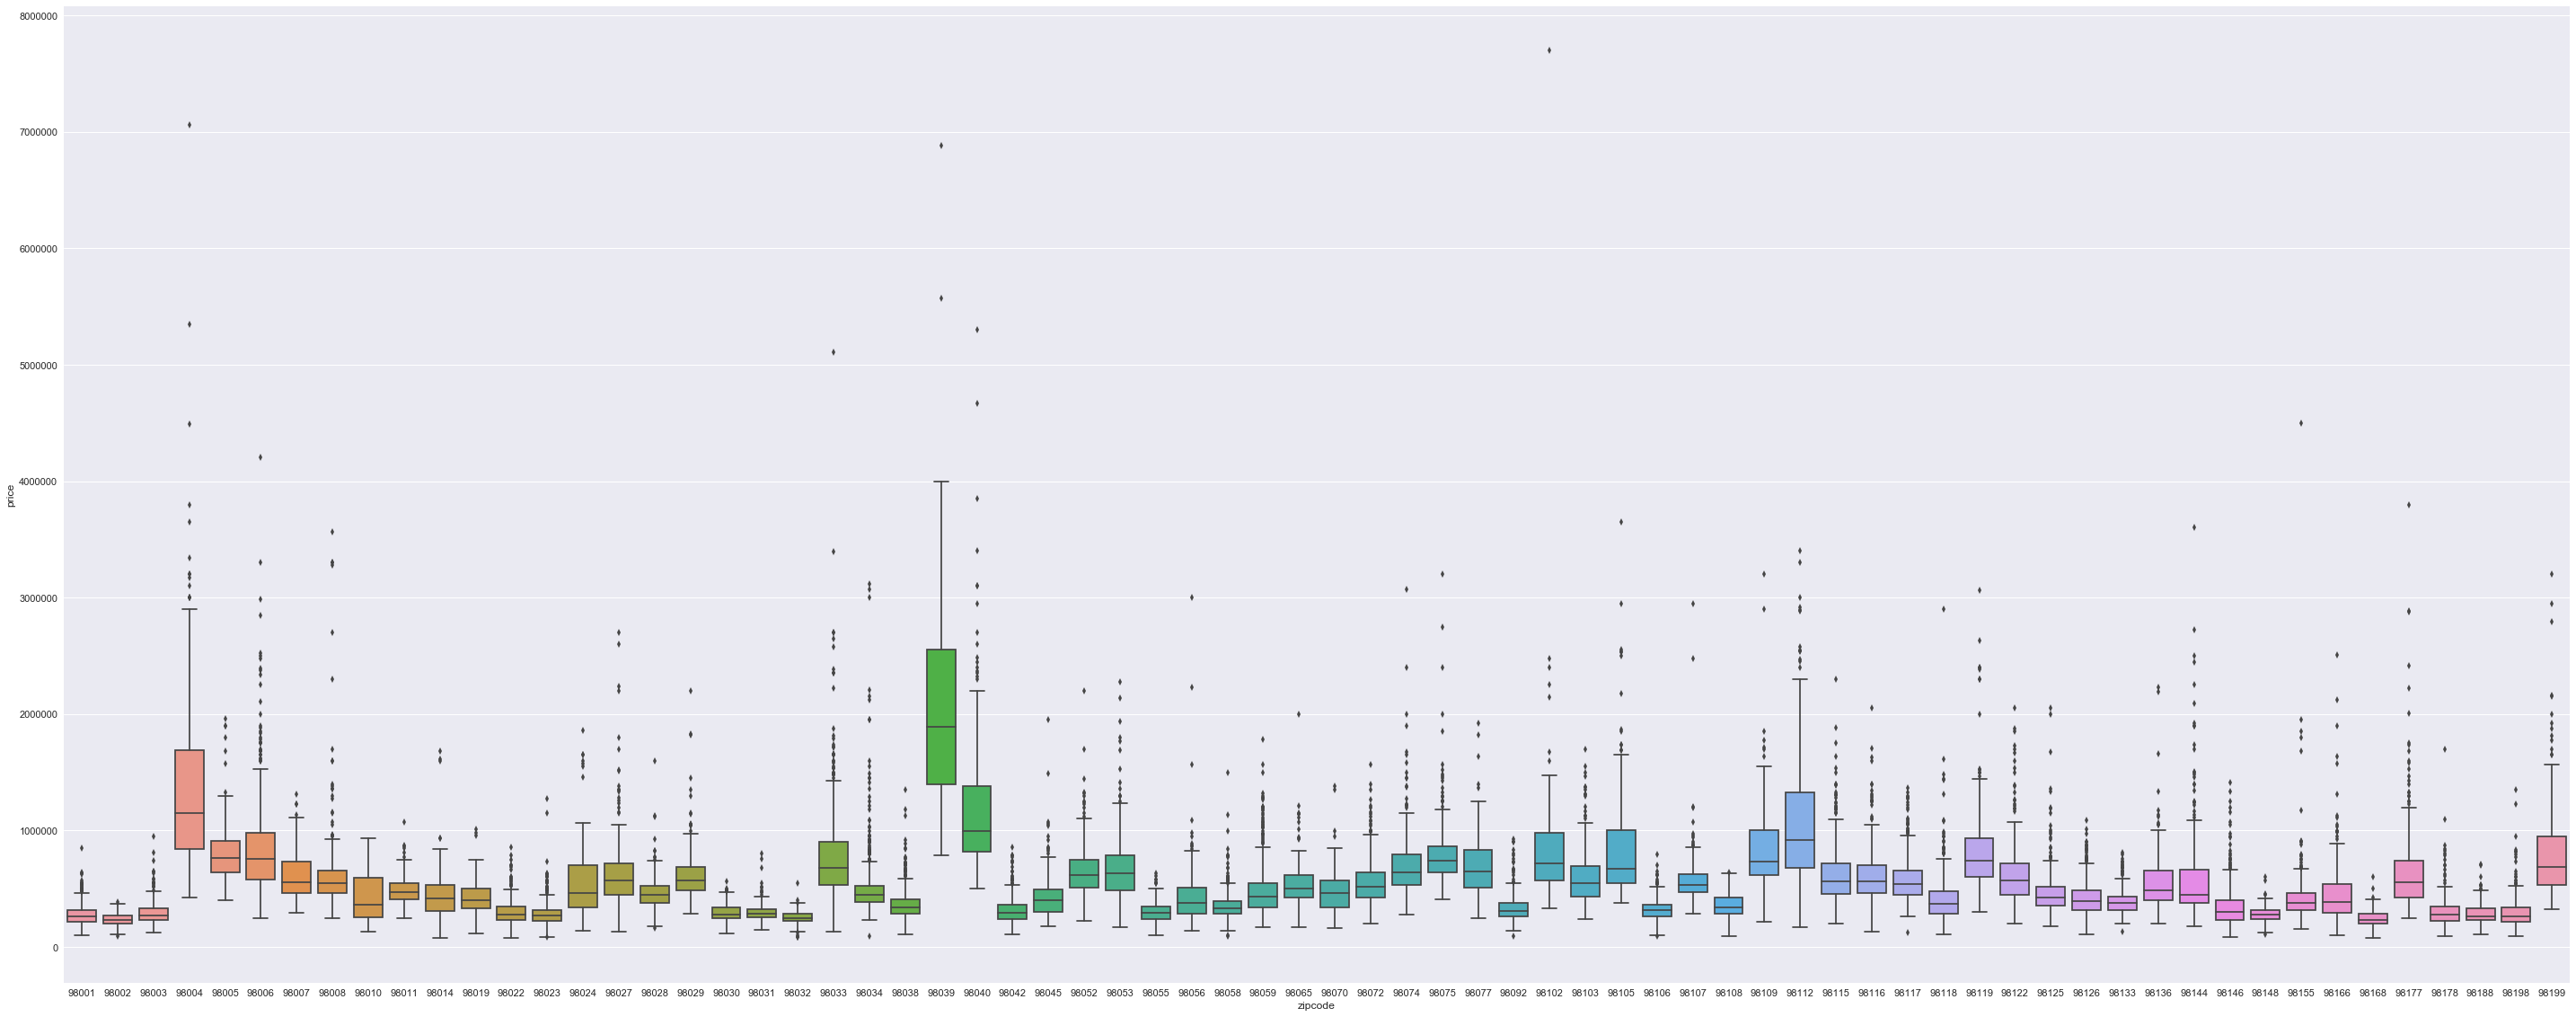

In [37]:
plt.figure(figsize=(50,20))
sns.set(font_scale=1.1)
sns.boxplot(y='price', x='zipcode', data=housing_data)

The boxplot graph above reveals that indeed, some regions are more expensive than others with 98039 being the most obvious with highest prices overall.  This isn't enough, though, as the graph doesn't say much about the other features which very well may also be impacting price in these respective zip codes.

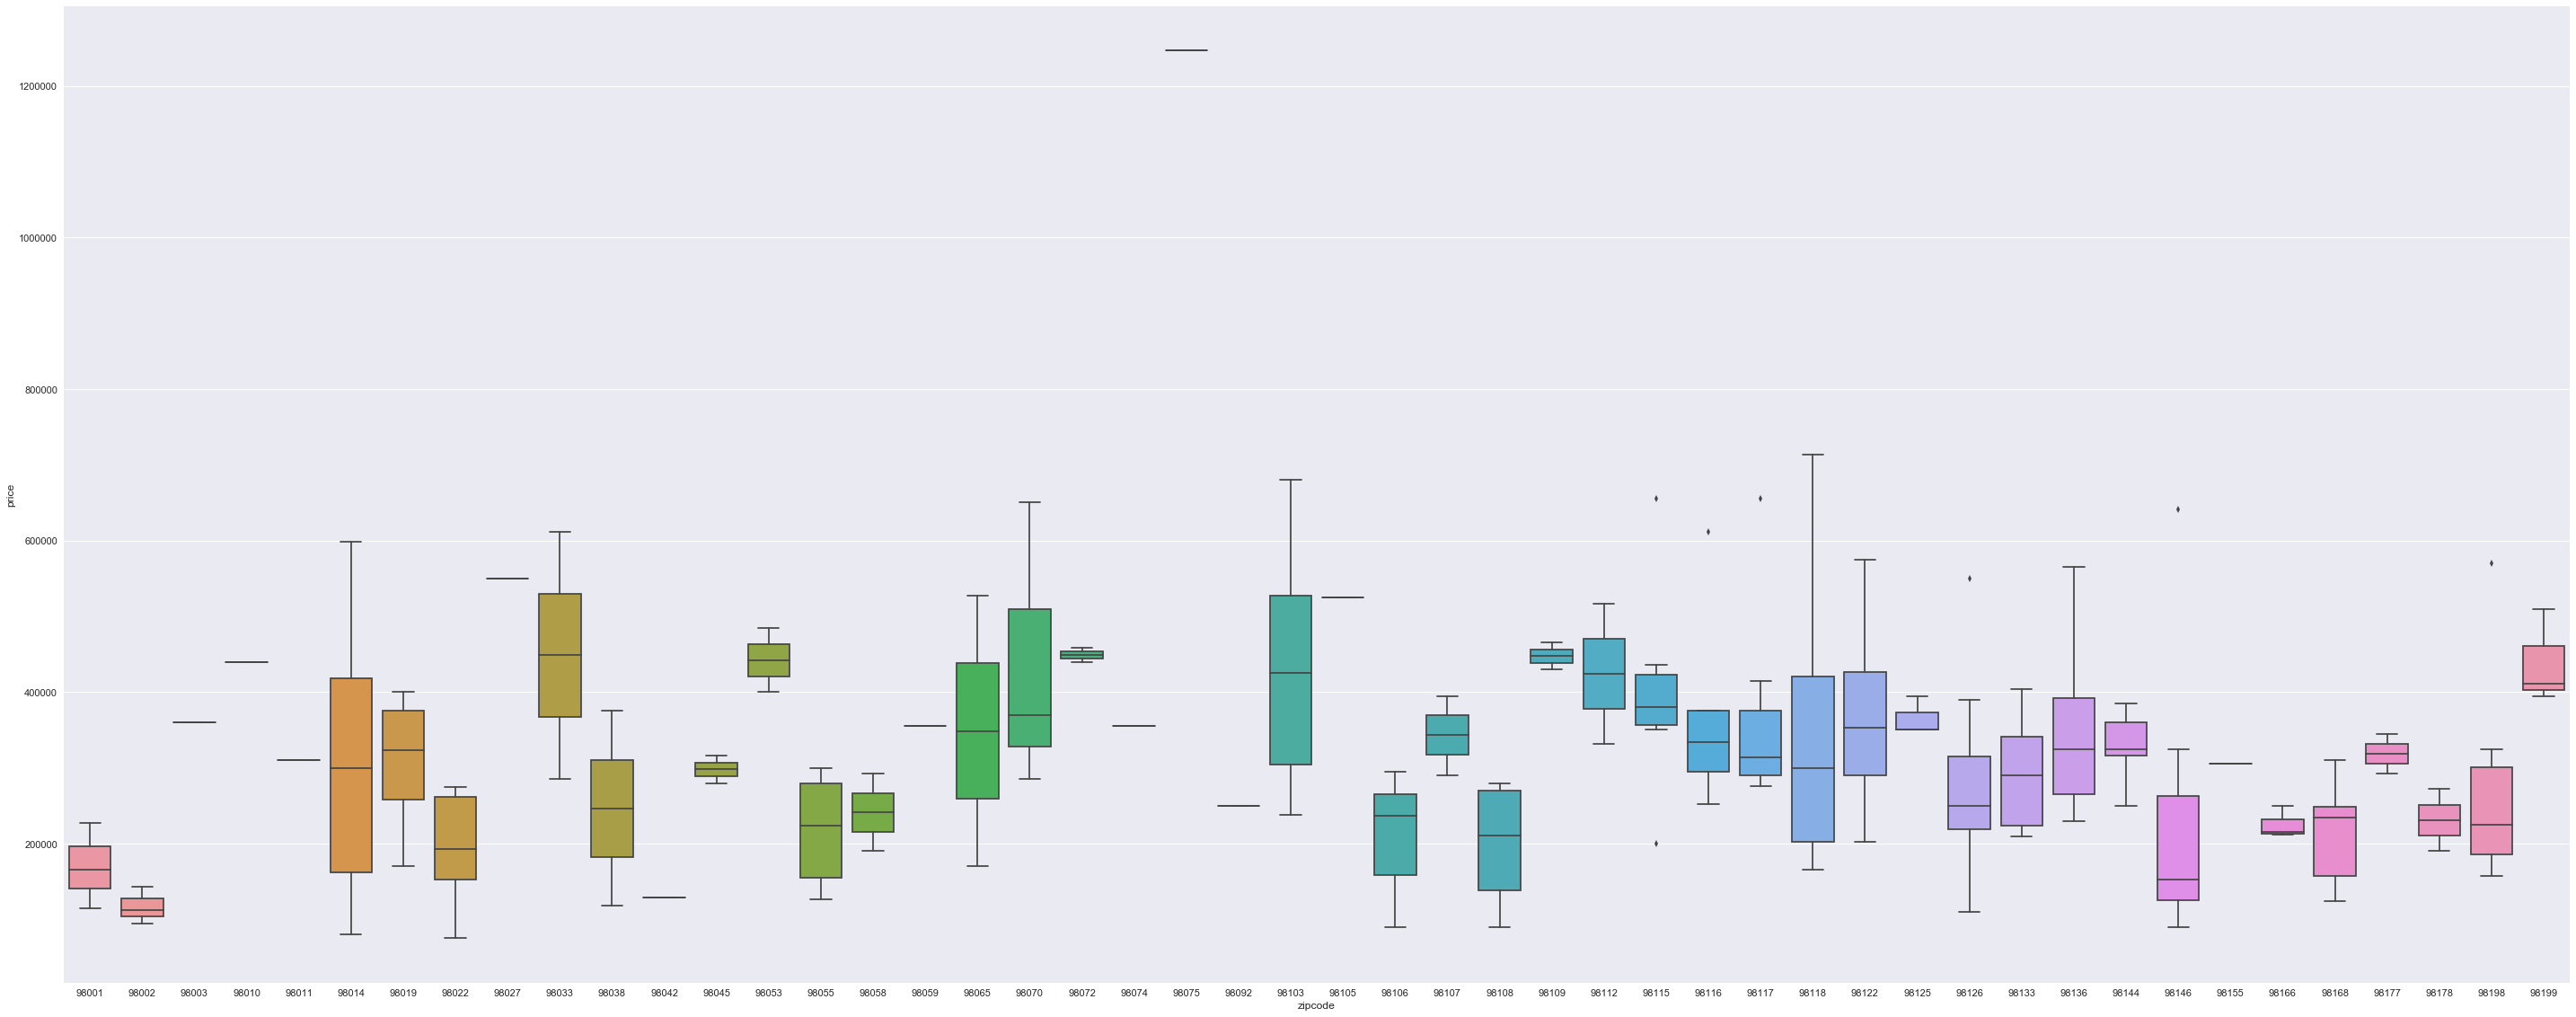

In [38]:
plt.figure(figsize=(50,20))
sns.set(font_scale=1.1)
sns.boxplot(y='price', x='zipcode', data=housing_data[(housing_data['bedrooms'] == 1)])

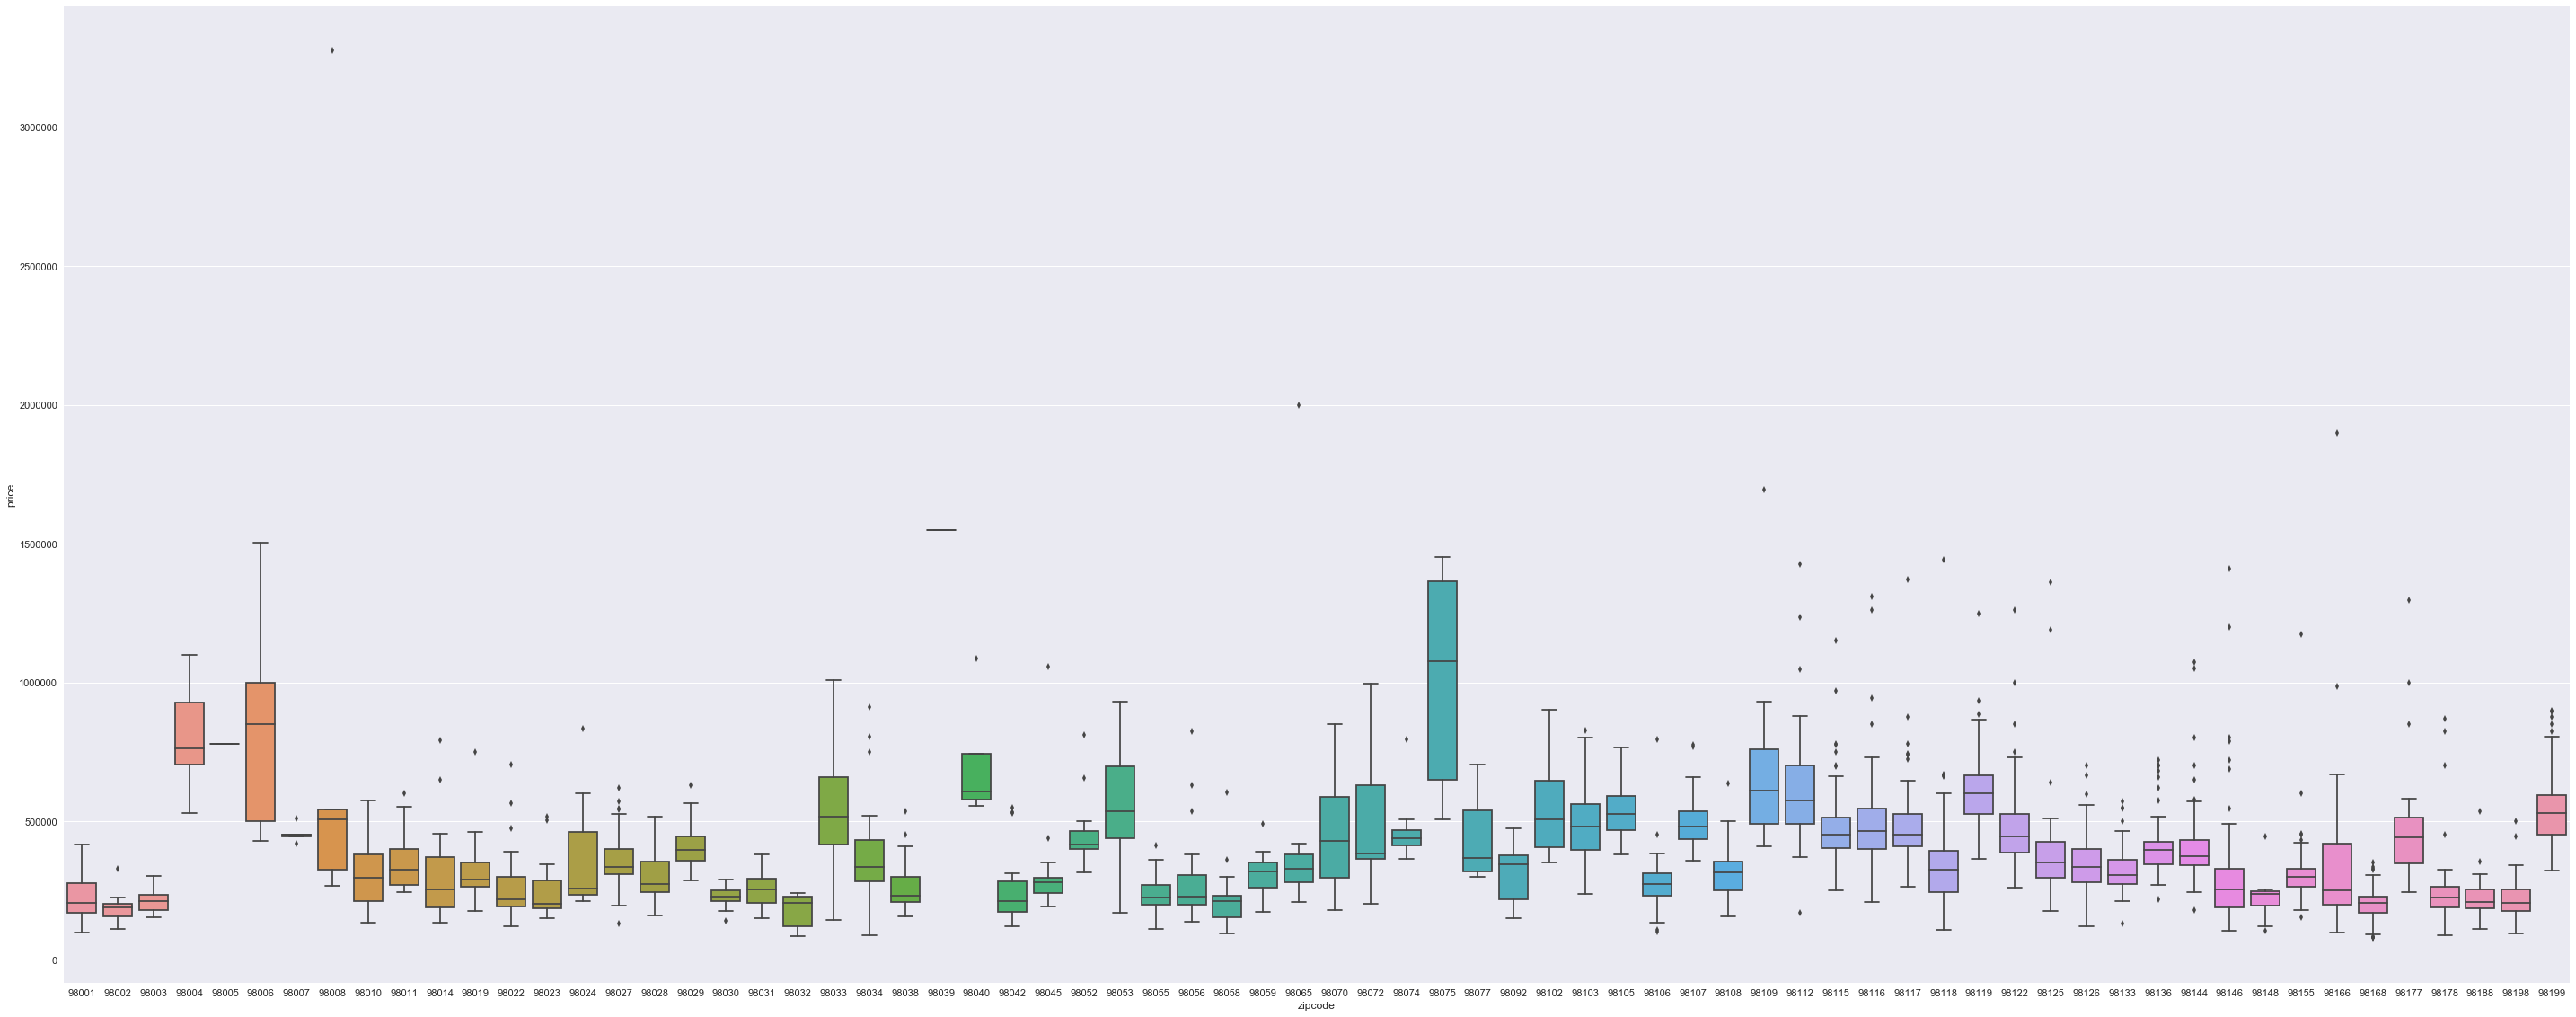

In [39]:
plt.figure(figsize=(50,20))
sns.set(font_scale=1.1)
sns.boxplot(y='price', x='zipcode', data=housing_data[(housing_data['bedrooms'] == 2)])

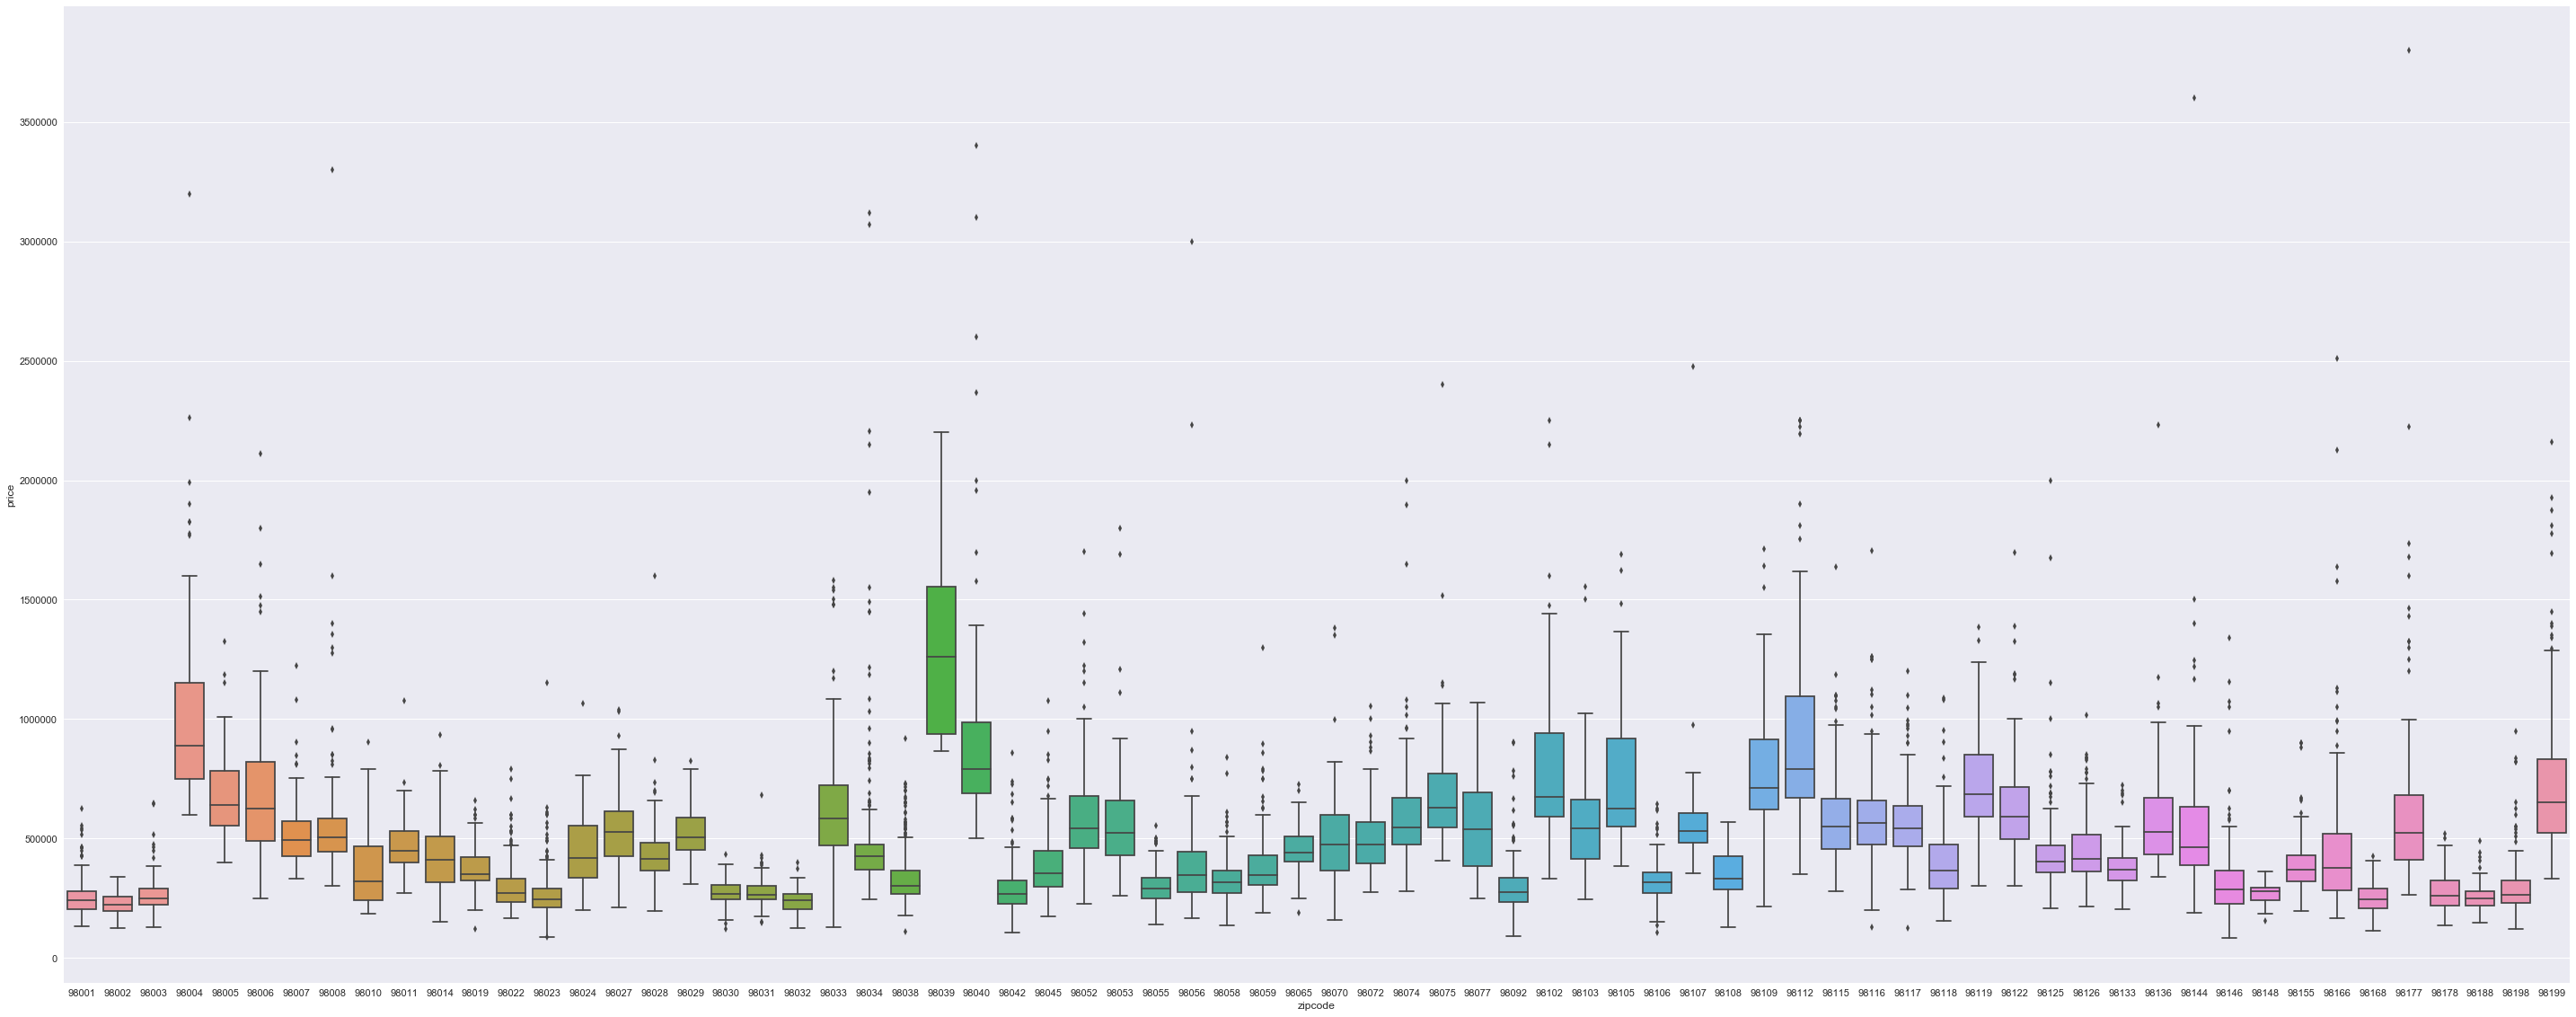

In [40]:
plt.figure(figsize=(50,20))
sns.set(font_scale=1.1)
sns.boxplot(y='price', x='zipcode', data=housing_data[(housing_data['bedrooms'] == 3)])

As the number of bedrooms increase, the overall median price tends to increase in each respective zipcode.

In [41]:
housing_data.dtypes
housing_data['yr_purch']=housing_data['yr_purch'].astype(np.int64)
housing_data['mnth_purch']=housing_data['mnth_purch'].astype(np.int64)
#housing_data.drop('date', axis=1, inplace=True)

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

scaler = StandardScaler()
kc_train, kc_test, train_Y, test_Y = train_test_split(housing_data, housing_data['price'], test_size=.25, random_state=42)
kc_train.drop('price', axis=1, inplace=True)
kc_train.drop('date', axis=1, inplace=True)
kc_train.drop('id', axis=1, inplace=True)

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.6/site-packages/sklearn/lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


In [43]:
from sklearn.linear_model import Lasso
from sklearn.cross_validation import cross_val_score
import xgboost as xgb

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-07-23 09:58:20.774135. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [44]:
gbm = xgb.XGBRegressor(n_estimators=2000, seed=42)
kc_train.dtypes
cv = cross_val_score(gbm, kc_train, train_Y, cv=10, scoring='r2')

In [45]:
print(cv.mean())
# 0.903300828982

0.903524308219


In [46]:
gbm.fit(kc_train, train_Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=2000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42, silent=True,
       subsample=1)

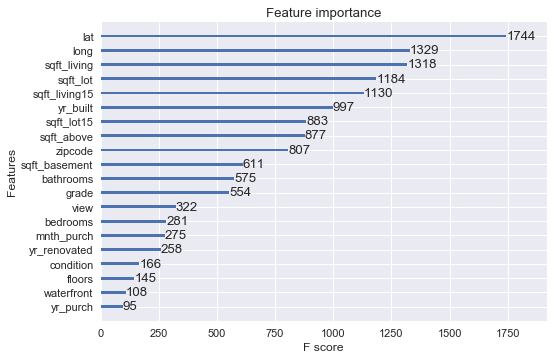

In [47]:
xgb.plot_importance(gbm)

# Conclusion
A few storylines emerge from the EDA process. Houses with large lot sizes or better grades tend to have a higher price, which is readily apparent if one considers the price of a shack vs. the price of a two story family house. Housing quality may play a large factor in the price, but another idea emerges, which is the importance of location. The baseline modeling process shows that. Through the analysis of price at zipcodes, it is apparent that location remains a large factor in housing prices.

Since the dataset supplies lat, long coordinates for each respective property, there remains a possibility to leveraging this into distance metrics which will be explored in the feature engineering section of the project. Refer to the iPython notebook titled Feature Engineering to continue into the modeling process.

An app was created in order to fully visualize and explore the price gradients across King County which can be accessed in the Visualization folder (see repo instructions).
<img src="ss.png"></img>